# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

#### Used splitfolders tool to split dataset into training, validation and test directories.

pip install split-folders

splitfolders --ratio 0.8 0.1 0.1 -- ./training/Plant_images/


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1506 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.66877764 0.6256404  0.65701294]
  [0.6691263  0.62598896 0.6573615 ]
  [0.6694749  0.62633765 0.6577102 ]
  ...
  [0.5365113  0.4737662  0.5129819 ]
  [0.5447028  0.48195773 0.5211734 ]
  [0.46297264 0.40022752 0.43944323]]

 [[0.6700596  0.62692237 0.6582949 ]
  [0.6699724  0.62683517 0.6582077 ]
  [0.6698852  0.62674797 0.6581205 ]
  ...
  [0.53703433 0.4742892  0.5135049 ]
  [0.5426981  0.47995293 0.5191687 ]
  [0.46236247 0.39961734 0.43883306]]

 [[0.68415594 0.6410186  0.6723912 ]
  [0.68380725 0.64067    0.67204255]
  [0.6834586  0.6403214  0.6716939 ]
  ...
  [0.5375573  0.4748122  0.5140279 ]
  [0.5406932  0.4779482  0.5171638 ]
  [0.46175233 0.3990072  0.43822291]]

 ...

 [[0.63752085 0.6218346  0.6806581 ]
  [0.6688857  0.65319943 0.71202296]
  [0.6777274  0.6620411  0.72086465]
  ...
  [0.4963289  0.4453485  0.51201516]
  [0.4970262  0.44604582 0.5127125 ]
  [0.49772352 0.4467431  0.5134098 ]]

 [[0.63821816 0.6225319  0.6813554 ]
  [0.66958296 0.6538967  0.7127203 ]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.71881986 0.7109767  0.754114  ]
  [0.7227094  0.7148663  0.75800353]
  [0.726599   0.71875584 0.7618931 ]
  ...
  [0.65865093 0.6468862  0.6743372 ]
  [0.65815085 0.64638615 0.6738371 ]
  [0.65765077 0.64588606 0.67333704]]

 [[0.71831983 0.7104767  0.75361395]
  [0.72220933 0.7143662  0.75750345]
  [0.7260989  0.71825576 0.761393  ]
  ...
  [0.6602451  0.6484804  0.67593145]
  [0.6792475  0.6674828  0.6949338 ]
  [0.69824976 0.68648505 0.71393603]]

 [[0.71781975 0.7099766  0.75311387]
  [0.7217093  0.7138662  0.7570034 ]
  [0.7255989  0.71775573 0.760893  ]
  ...
  [0.80250984 0.79074514 0.8181961 ]
  [0.79600906 0.78424436 0.81169534]
  [0.7895083  0.7777436  0.80519456]]

 ...

 [[0.6767273  0.67391443 0.70409614]
  [0.6757271  0.67241424 0.6995956 ]
  [0.6747271  0.67091405 0.695095  ]
  ...
  [0.71308607 0.7013213  0.7444586 ]
  [0.5550659  0.54330117 0.5864384 ]
  [0.5415218  0.5297571  0.57289433]]

 [[0.6745098  0.6733691  0.6857752 ]
  [0.6745098  0.67386913 0.684275  ]


## Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
1506/32

47.0625

In [14]:
215/32

6.71875

# Model Fitting
## Training Model On Dataset

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=50,
)

Epoch 1/50


47/47 [==============================] - 52s 1s/step - loss: 0.9299 - accuracy: 0.4654 - val_loss: 0.8894 - val_accuracy: 0.4948
Epoch 2/50
47/47 [==============================] - 34s 712ms/step - loss: 0.7426 - accuracy: 0.6431 - val_loss: 0.5881 - val_accuracy: 0.7969
Epoch 3/50
47/47 [==============================] - 44s 945ms/step - loss: 0.5566 - accuracy: 0.7598 - val_loss: 0.6836 - val_accuracy: 0.7188
Epoch 4/50
47/47 [==============================] - 49s 1s/step - loss: 0.4499 - accuracy: 0.8114 - val_loss: 0.3355 - val_accuracy: 0.8594
Epoch 5/50
47/47 [==============================] - 43s 910ms/step - loss: 0.3115 - accuracy: 0.8738 - val_loss: 0.2976 - val_accuracy: 0.8594
Epoch 6/50
47/47 [==============================] - 35s 745ms/step - loss: 0.2684 - accuracy: 0.8921 - val_loss: 0.2173 - val_accuracy: 0.9115
Epoch 7/50
47/47 [==============================] - 34s 729ms/step - loss: 0.2867 - accuracy: 0.8867 - val_loss: 0.4816 - val_accuracy: 0.7917
Epo

In [18]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 10s 745ms/step - loss: 0.1228 - accuracy: 0.9513


In [19]:
scores

[0.1228019967675209, 0.9512761235237122]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [20]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [21]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 47}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [23]:
type(history.history['loss'])

list

In [24]:
len(history.history['loss'])

50

In [25]:
history.history['loss'][:5]

[0.9299268126487732,
 0.7425816059112549,
 0.5566350817680359,
 0.449880450963974,
 0.3115363121032715]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
val_acc

[0.4947916567325592,
 0.796875,
 0.71875,
 0.859375,
 0.859375,
 0.9114583134651184,
 0.7916666865348816,
 0.859375,
 0.875,
 0.8958333134651184,
 0.9375,
 0.9270833134651184,
 0.9427083134651184,
 0.9635416865348816,
 0.9375,
 0.953125,
 0.953125,
 0.9635416865348816,
 0.9739583134651184,
 0.9739583134651184,
 0.9583333134651184,
 0.9583333134651184,
 0.9895833134651184,
 0.9947916865348816,
 0.9583333134651184,
 0.9583333134651184,
 0.9635416865348816,
 0.984375,
 0.9895833134651184,
 0.9583333134651184,
 0.9895833134651184,
 0.9947916865348816,
 0.984375,
 0.984375,
 0.9739583134651184,
 0.9895833134651184,
 0.9895833134651184,
 0.9947916865348816,
 0.96875,
 0.96875,
 0.9895833134651184,
 0.9895833134651184,
 0.8385416865348816,
 0.9583333134651184,
 0.9791666865348816,
 0.96875,
 1.0,
 0.953125,
 0.984375,
 0.96875]

In [28]:
acc

[0.4654002785682678,
 0.643147885799408,
 0.7598371505737305,
 0.8113975524902344,
 0.873812735080719,
 0.8921302556991577,
 0.886702835559845,
 0.8765264749526978,
 0.9090909361839294,
 0.9043419361114502,
 0.9213025569915771,
 0.9348710775375366,
 0.9443690776824951,
 0.9592944383621216,
 0.9620081186294556,
 0.9559022784233093,
 0.9497964978218079,
 0.9674355387687683,
 0.9715061187744141,
 0.9748982191085815,
 0.9762550592422485,
 0.9796472191810608,
 0.9810040593147278,
 0.9782903790473938,
 0.9877883195877075,
 0.9708276987075806,
 0.9789687991142273,
 0.9837177991867065,
 0.9911804795265198,
 0.9796472191810608,
 0.9891451597213745,
 0.9911804795265198,
 0.9891451597213745,
 0.989823579788208,
 0.975576639175415,
 0.9959294199943542,
 0.997286319732666,
 0.998643159866333,
 0.9850746393203735,
 0.9945725798606873,
 0.9979647397994995,
 0.9891451597213745,
 0.9179104566574097,
 0.9179104566574097,
 0.9633650183677673,
 0.9708276987075806,
 0.9776119589805603,
 0.975576639175415,


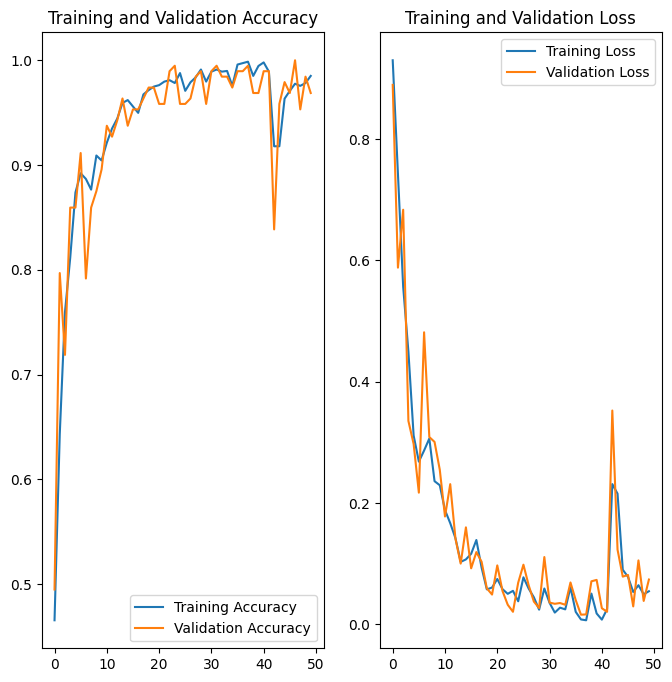

In [29]:
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 202ms/step
predicted label: Potato___healthy


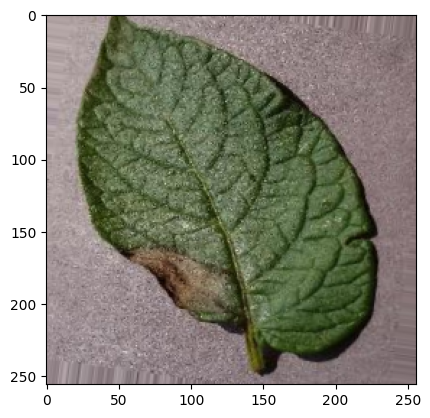

In [33]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 31ms/step


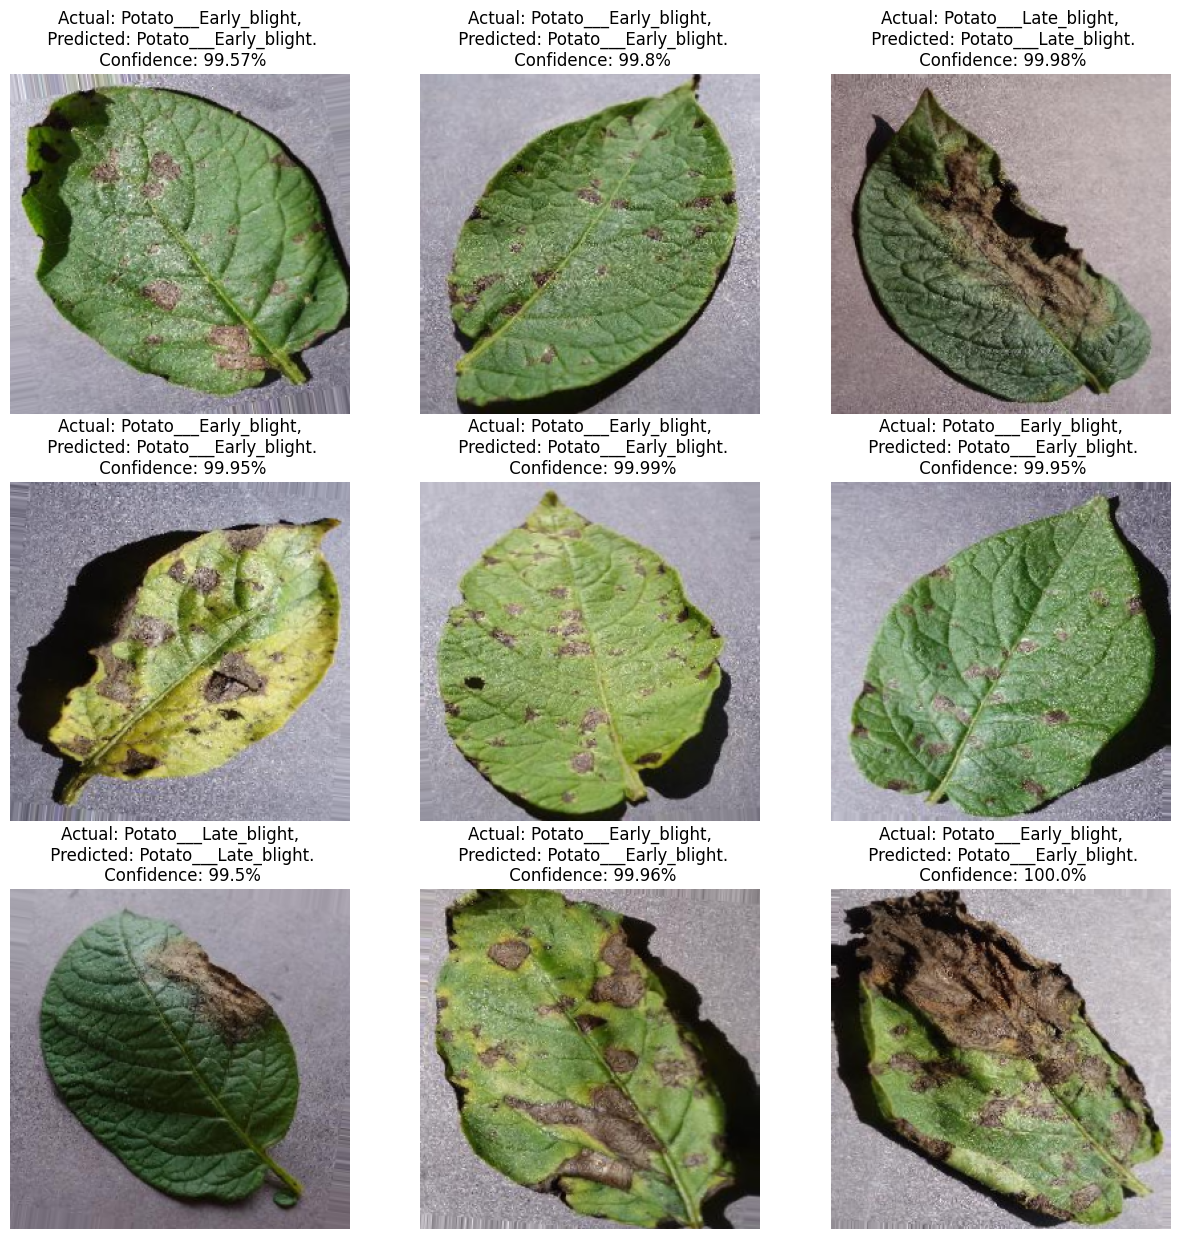

In [43]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [44]:
model.save("../potato_disease.h5")